In [1]:
import mxnet as mx
import numpy as np
import os
import logging

/home/anm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import mnist

In [3]:
mnist.downloadmnist("data/mnist")

data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists


In [4]:
train_x, train_y, test_x, test_y = mnist.readmnist('data/mnist')

In [10]:
height = 28
width = 28
num_channel = 1
num_train_images = np.shape(train_x)[0]
num_test_images = np.shape(test_x)[0]

In [9]:
np.shape(train_x)

(60000, 784)

In [14]:
np.shape(train_x.reshape(60000,1,28,28))

(60000, 1, 28, 28)

In [22]:
train_x_img = train_x.reshape(num_train_images, num_channel, height, width)
text_x_img = test_x.reshape(num_test_images, num_channel, height, width)

In [23]:
epochs = 10
batch_size = 128

In [24]:
train_iter = mx.io.NDArrayIter(data = train_x, label = train_y, batch_size = batch_size, shuffle = True)

In [25]:
data = mx.sym.Variable("data")

In [38]:
# Convolution layers
conv1 = mx.sym.Convolution(data = data, kernel = (3,3), num_filter = 32)
tanh1 = mx.sym.Activation(data = conv1, act_type = "tanh")
pool1 = mx.sym.Pooling(data = tanh1, pool_type = "max", kernel = (2,2), stride = (2,2))

conv2 = mx.sym.Convolution(data = tanh1, kernel = (5,5), num_filter = 64)
tanh2 = mx.sym.Activation(data = conv2, act_type = "tanh")
pool2 = mx.sym.Pooling(data = tanh2, pool_type = "max", kernel = (2,2), stride = (2,2))

f1 = mx.sym.flatten(data = pool2)
fc1 = mx.sym.FullyConnected(data = f1, num_hidden = 128)
tanh3 = mx.sym.Activation(data = fc1, act_type = "tanh")

fc2 = mx.sym.FullyConnected(data = tanh3, num_hidden = 10)
out = mx.sym.SoftmaxOutput(data = fc2, name = "softmax")

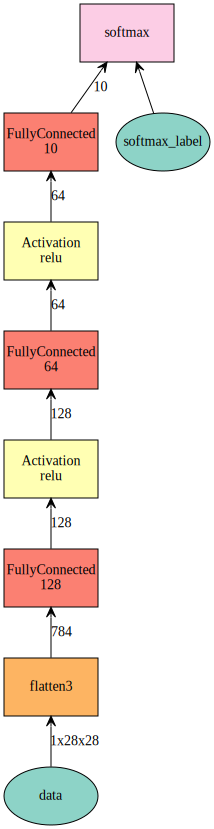

In [49]:
# Create a place holder variable for the input data
data = mx.sym.Variable('data')
# Flatten the data from 4-D shape (batch_size, num_channel, width, height) 
# into 2-D (batch_size, num_channel*width*height)
data = mx.sym.Flatten(data=data)

# The first fully-connected layer
fc1  = mx.sym.FullyConnected(data=data, name='fc1', num_hidden=128)
# Apply relu to the output of the first fully-connnected layer
act1 = mx.sym.Activation(data=fc1, name='relu1', act_type="relu")

# The second fully-connected layer and the according activation function
fc2  = mx.sym.FullyConnected(data=act1, name='fc2', num_hidden = 64)
act2 = mx.sym.Activation(data=fc2, name='relu2', act_type="relu")

# The thrid fully-connected layer, note that the hidden size should be 10, which is the number of unique digits
fc3  = mx.sym.FullyConnected(data=act2, name='fc3', num_hidden=10)
# The softmax and loss layer
mlp  = mx.sym.SoftmaxOutput(data=fc3, name='softmax')

# We visualize the network structure with output size (the batch_size is ignored.)
shape = {"data" : (batch_size, 1, 28, 28)}
mx.viz.plot_network(symbol=mlp, shape=shape)

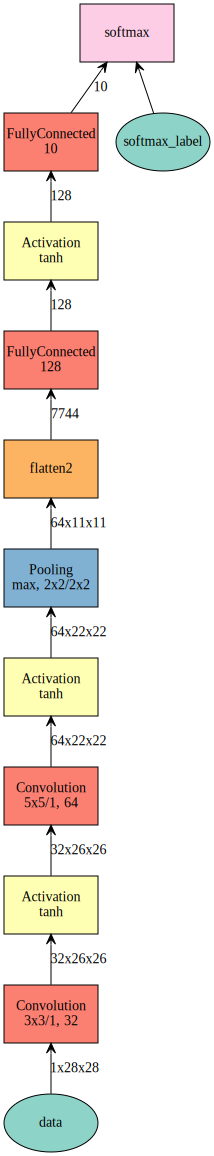

In [39]:
temp_shape = {"data":(batch_size,1,28,28)}
mx.viz.plot_network(symbol = out, shape = temp_shape)

In [50]:
logging.getLogger().setLevel(logging.DEBUG)

In [51]:
mod = mx.mod.Module(out)

In [52]:
mod.bind(data_shapes = train_iter.provide_data, label_shapes = train_iter.provide_label)

In [53]:
mod.init_params(initializer = mx.init.Xavier(magnitude = 2.))

In [54]:
mod.fit(train_iter, num_epoch = epochs,  batch_end_callback = mx.callback.Speedometer(batch_size, 200))

/home/anm/anaconda3/lib/python3.6/site-packages/mxnet/module/base_module.py:488: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Train-accuracy=0.900000
INFO:root:Epoch[0] Time cost=29.277


KeyboardInterrupt: 

In [47]:
mod.score(train_iter,['acc'])

10